In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torchvision import datasets, transforms

In [4]:
# Define simple transforms (you can replace these with your own get_mnist_transform() / get_cifar10_transform())
mnist_transform = transforms.ToTensor()
cifar_transform = transforms.ToTensor()

# MNIST
mnist_train_set = datasets.MNIST(
    root="data",
    train=True,
    download=False,
    transform=mnist_transform
)
mnist_test_set = datasets.MNIST(
    root="data",
    train=False,
    download=False,
    transform=mnist_transform
)

# Extract raw images and labels for EDA:
#   - train_set.data is a torch.Tensor of shape (60000, 28, 28) with dtype uint8
#   - train_set.targets is a torch.Tensor of shape (60000,)
mnist_train_images = mnist_train_set.data.numpy()        # shape: (60000, 28, 28)
mnist_train_labels = mnist_train_set.targets.numpy()     # shape: (60000,)
mnist_test_images = mnist_test_set.data.numpy()          # shape: (10000, 28, 28)
mnist_test_labels = mnist_test_set.targets.numpy()       # shape: (10000,)

# CIFAR-10
cifar_train_set = datasets.CIFAR10(
    root="data",
    train=True,
    download=False,
    transform=cifar_transform
)
cifar_test_set = datasets.CIFAR10(
    root="data",
    train=False,
    download=False,
    transform=cifar_transform
)

# For CIFAR10, train_set.data is a numpy array of shape (50000, 32, 32, 3)
# and train_set.targets is a Python list of length 50000. Convert to numpy array.
cifar_train_images = np.array(cifar_train_set.data)      # shape: (50000, 32, 32, 3)
cifar_train_labels = np.array(cifar_train_set.targets)   # shape: (50000,)
cifar_test_images = np.array(cifar_test_set.data)        # shape: (10000, 32, 32, 3)
cifar_test_labels = np.array(cifar_test_set.targets)     # shape: (10000,)

In [5]:
#dataloading
# MNIST
num_mnist = mnist_train_images.shape[0]                 # 60000
mnist_flat = mnist_train_images.reshape(num_mnist, 28 * 28)  # flatten each 28×28 → length 784
df_mnist = pd.DataFrame(mnist_flat)
df_mnist['label'] = mnist_train_labels

# CIFAR-10
num_cifar = cifar_train_images.shape[0]                 # 50000
cifar_flat = cifar_train_images.reshape(num_cifar, 32 * 32 * 3)  # flatten each 32×32×3 → length 3072
df_cifar = pd.DataFrame(cifar_flat)
df_cifar['label'] = cifar_train_labels

In [6]:
# dataframes
# MNIST
num_mnist = mnist_train_images.shape[0]                 # 60000
mnist_flat = mnist_train_images.reshape(num_mnist, 28 * 28)  # flatten each 28×28 → length 784
df_mnist = pd.DataFrame(mnist_flat)
df_mnist['label'] = mnist_train_labels

# CIFAR-10
num_cifar = cifar_train_images.shape[0]                 # 50000
cifar_flat = cifar_train_images.reshape(num_cifar, 32 * 32 * 3)  # flatten each 32×32×3 → length 3072
df_cifar = pd.DataFrame(cifar_flat)
df_cifar['label'] = cifar_train_labels

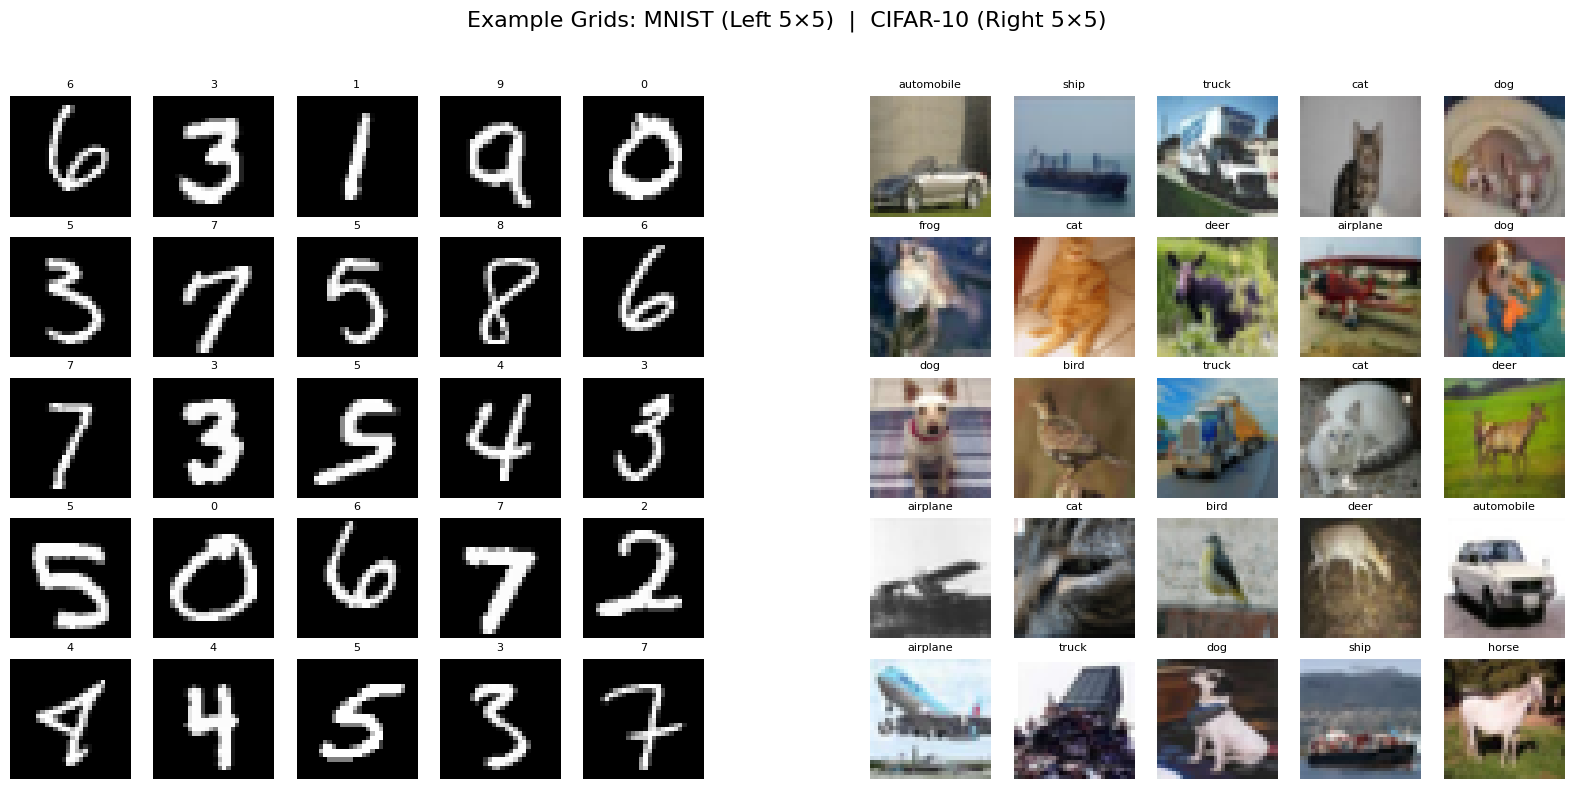

In [11]:
# Cell 4: Example-Showing Task — 5×5 Grids with Labels on Every Image
#(Left block = MNIST, Right block = CIFAR-10 with names)

import matplotlib.pyplot as plt
import numpy as np

# --- 1. Prepare class-name mapping for CIFAR-10 ---
cifar_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# --- 2. Pick 25 random indices from each dataset ---
mnist_idx = np.random.choice(len(mnist_train_images), 25, replace=False)
cifar_idx = np.random.choice(len(cifar_train_images), 25, replace=False)

# --- 3. Create a 5×11 grid: columns 0–4 for MNIST, col 5 blank, cols 6–10 for CIFAR ---
fig, axes = plt.subplots(nrows=5, ncols=11, figsize=(16, 8))
fig.suptitle("Example Grids: MNIST (Left 5×5)  |  CIFAR-10 (Right 5×5)", fontsize=16)

# --- 4. Fill in the MNIST 5×5 block (cols 0–4) and set titles = digit labels ---
for i in range(5):            # row index
    for j in range(5):        # col index (0–4)
        idx = mnist_idx[i * 5 + j]
        ax = axes[i, j]
        ax.imshow(mnist_train_images[idx], cmap="gray")
        ax.axis("off")
        # Always show the digit above every image:
        ax.set_title(str(mnist_train_labels[idx]), fontsize=8)

# --- 5. Leave column 5 blank as a spacer ---
for i in range(5):
    axes[i, 5].axis("off")

# --- 6. Fill in the CIFAR-10 5×5 block (cols 6–10) and set titles = class names ---
for i in range(5):
    for j in range(5):
        idx = cifar_idx[i * 5 + j]
        ax = axes[i, j + 6]
        ax.imshow(cifar_train_images[idx])
        ax.axis("off")
        # Look up the class name and place it above each image:
        class_idx = cifar_train_labels[idx]
        ax.set_title(cifar_classes[class_idx], fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95], w_pad=0.5)
plt.show()

/var/folders/8l/p__j5rzn0j7d99kg05f8_l8m0000gn/T/ipykernel_6070/869702669.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=mnist_train_counts, ax=ax, palette="Blues_d")
/var/folders/8l/p__j5rzn0j7d99kg05f8_l8m0000gn/T/ipykernel_6070/869702669.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=mnist_test_counts, ax=ax, palette="Blues_d")
/var/folders/8l/p__j5rzn0j7d99kg05f8_l8m0000gn/T/ipykernel_6070/869702669.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=cifar_train_counts, ax=ax, palette="

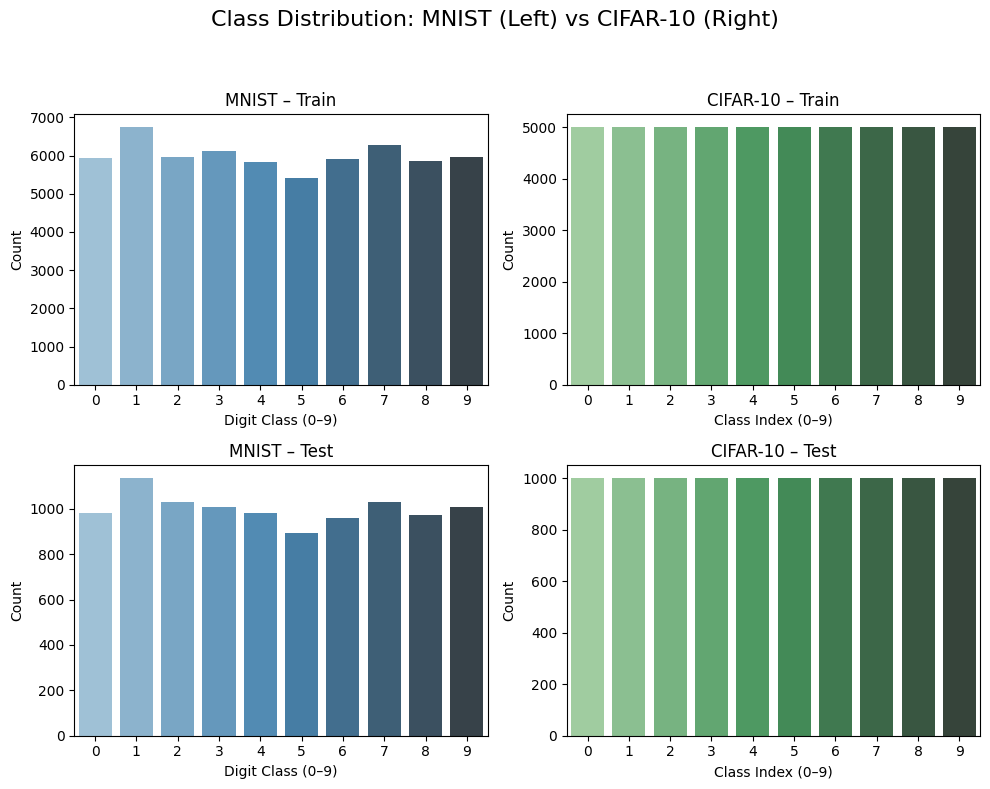

In [8]:
# Compute class‐counts 0–9 for MNIST train/test and CIFAR train/test
mnist_train_counts = np.bincount(mnist_train_labels, minlength=10)
mnist_test_counts  = np.bincount(mnist_test_labels,  minlength=10)
cifar_train_counts = np.bincount(cifar_train_labels, minlength=10)
cifar_test_counts  = np.bincount(cifar_test_labels,  minlength=10)
classes = np.arange(10)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("Class Distribution: MNIST (Left) vs CIFAR-10 (Right)", fontsize=16)

# ─── Left column: MNIST ────────────────────────────────────
ax = axes[0, 0]
sns.barplot(x=classes, y=mnist_train_counts, ax=ax, palette="Blues_d")
ax.set_title("MNIST – Train")
ax.set_xlabel("Digit Class (0–9)")
ax.set_ylabel("Count")

ax = axes[1, 0]
sns.barplot(x=classes, y=mnist_test_counts, ax=ax, palette="Blues_d")
ax.set_title("MNIST – Test")
ax.set_xlabel("Digit Class (0–9)")
ax.set_ylabel("Count")

# ─── Right column: CIFAR-10 ─────────────────────────────────
ax = axes[0, 1]
sns.barplot(x=classes, y=cifar_train_counts, ax=ax, palette="Greens_d")
ax.set_title("CIFAR-10 – Train")
ax.set_xlabel("Class Index (0–9)")
ax.set_ylabel("Count")

ax = axes[1, 1]
sns.barplot(x=classes, y=cifar_test_counts, ax=ax, palette="Greens_d")
ax.set_title("CIFAR-10 – Test")
ax.set_xlabel("Class Index (0–9)")
ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

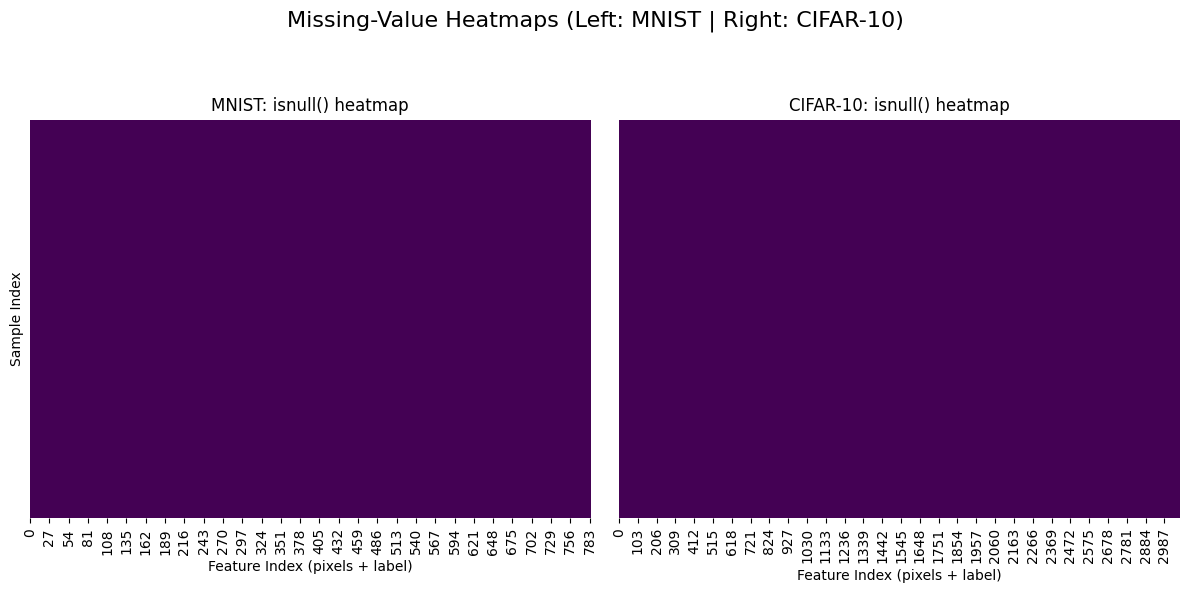

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Missing-Value Heatmaps (Left: MNIST | Right: CIFAR-10)", fontsize=16)

# Left: MNIST isnull()
ax = axes[0]
sns.heatmap(
    df_mnist.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False,
    ax=ax
)
ax.set_title("MNIST: isnull() heatmap")
ax.set_xlabel("Feature Index (pixels + label)")
ax.set_ylabel("Sample Index")

# Right: CIFAR-10 isnull()
ax = axes[1]
sns.heatmap(
    df_cifar.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False,
    ax=ax
)
ax.set_title("CIFAR-10: isnull() heatmap")
ax.set_xlabel("Feature Index (pixels + label)")
ax.set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()